# Predicting the Customer Sentiments from Yelp Dataset

## Introduction and General Information

* Sentiment Analysis is a process of determining whether a text is expressing positive, negative or neutral opinion about a particular product or services. Every business relies on the customer's requirements and feedbacks, so understanding what the customers feel about their services is a very crutial task.


* It consists of natural language processing, statistical and text analysis techniques to identify the sentiments of various words/phrases as positive, neutral or negative.


* Sentiment Analysis is carried out on the information gathered from social media, surveys, online reviews or other channels. Hence, most of the data obtained is unstructured which requires some pre-processing to be carried out.


* Natural Language Processing is a collection of methods to process the unstructured content and understand the text. In this project, we will use python Natural Language Toolkit (NLTK) library to process and convert the customer reviews text into a machine readable form. 


## Objectives

* Exploring the dataset containing information of various businesses and their customer ratings.


* Performing Sentiment Analysis of the customer reviews for Beauty and Spa Services located in the United States.


* Building Machine Learning models to predict whether the sentiment is positive or negative.

## Data Used
(Data Source: https://www.kaggle.com/yelp-dataset/yelp-dataset)

* Yelp dataset contains the information about the businesses from across 11 metropolitan areas.


* This dataset consists of JSON files for business information, reviews, customer checkins, tip details and user information.


* For the purpose of this project, business and reviews dataset has been filtered to obtain the data related to 'Beauty and Spas' business category.

## Approach and Methodology

* Convert the businesses and reviews JSON files to CSV. Load the data from these CSV files to pandas dataframe.


* Filter the data related to Beauty and Spa Services located in the US from the business and reviews dataframe.


* Perform exploratory analysis on the filtered dataset.


* Categorize the ratings as 'Good Reviews' and 'Bad Reviews'. All the ratings are in the range 0 - 5, so categorize ratings above 4 as 'Good Reviews' and below 4 as 'Bad Reviews'.


* Pre-process the textual reviews by removing unwanted elements from the text before performing Natural Language Processing. 


* Perform feature extraction for sentiment analysis using following techniques:
    * **Bag of Words Model:** Textual reviews are converted into tokens and each token is associated with a certain review label (Good or Bad)
    * **Polarity Scores:** Using VADER model for scanning the text and assigning positive, negative, or neutral polarity scores to the text.
    * **doc2vec Model:** Using Gensim modeling toolkit to convert text document to vectors to capture the relationship between different words.
    
    
* For the extracted features using each of the above feature extraction techniques, build and train sentiments classification models. Compute prediction accuracy to evaluate the model performance.


### 1. Importing Libraries

In [1]:
import pathlib
import numpy as np
import pandas as pd
import json
import random
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(context = 'notebook', style = 'dark', palette = 'colorblind')
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk import classify
from nltk import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

/Users/nbgandhi/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nbgandhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nbgandhi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nbgandhi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### 2. Loading the JSON data into dataframes

In [2]:
# Defining data files path
BASE_PATH = str(pathlib.Path().absolute())
BUSINESS_DATA_PATH = BASE_PATH + '/yelp_academic_dataset_business.json'
REVIEW_DATA_PATH = BASE_PATH + '/yelp_academic_dataset_review.json'


In [3]:
# Creating dataframes
business_df = pd.read_json (BUSINESS_DATA_PATH, lines = True)
review_df = pd.read_json (REVIEW_DATA_PATH, lines = True)


#### A peek into the dataframes

In [4]:
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [5]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


### 3. Preparing data for Sentiment Analysis of Beauty and Spa Services

In [6]:
# Dropping the rows in the 'categories' column with missing values
business_df.dropna(subset=['categories'], inplace=True)

# Filtering Beauty and Spa businesses from the business dataframe
beauty_business_df = business_df[business_df['categories'].str.contains("Beauty & Spas")]

# Filtering Beauty and Spa businesses located in the United States
non_us_states = ['ON', 'AB', 'QC']
beauty_business_us_df = beauty_business_df[~beauty_business_df['state'].isin(non_us_states)]

# Joining Reviews dataframe and Beauty and Spa business dataframes.
# The resultant dataframe will contain only those rows with Beauty and Spa category businesses.
beauty_combined_us_df = pd.merge(left=review_df, right=beauty_business_us_df, left_on='business_id', right_on='business_id')

# Keeping only required columns for further analysis
beauty_reviews_us_df = beauty_combined_us_df[['review_id', 'user_id', 'business_id', 'name', 'stars_x', 'text', 'useful', 'funny', 'cool', 'state']]
beauty_reviews_us_df.rename(columns = {'user_id': 'customer_id', 'name': 'business_name', 'stars_x': 'ratings', 'text': 'customer_review'}, inplace = True)



In [7]:
beauty_reviews_us_df.head()

,review_id,customer_id,business_id,business_name,ratings,customer_review,useful,funny,cool,state
0,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,Rio Hair Salon,1,I am actually horrified this place is still in...,1,1,0,AZ
1,i5AtsDlF3fSnBQ5gAgTbeg,VraV4Ci-oJsONsoIWCNeXA,lbrU8StCq3yDfr-QMnGrmQ,Rio Hair Salon,2,Had a haircut there once with the owner and it...,3,1,0,AZ
2,kSRygZjrxPIem7X6FDFZPA,V0bjhLRLphO2OYj-enP-dw,lbrU8StCq3yDfr-QMnGrmQ,Rio Hair Salon,1,I came in this evening to get a haircut. There...,1,0,0,AZ
3,lpFIJYpsvDxyph-kPzZ6aA,dsd-KNYKMpx6ma_sRWCSkQ,FNCJpSn0tL9iqoY3JC73qw,Centennial Dermatology & Skin Cancer,5,"Awesome office and staff, very professional an...",0,0,0,NV
4,n_5tzMmaeBCUigwjnBQbow,Rl9tRa2QlcjGSvIfUVFwSQ,FNCJpSn0tL9iqoY3JC73qw,Centennial Dermatology & Skin Cancer,5,I feel so lucky to have found Centennial derma...,0,0,0,NV


In [8]:
beauty_reviews_us_df.shape

(460289, 10)

### 4. Dataset Exploration

In [9]:
# Creating a bar plot
def create_bar_plot(data, title_name, x_label, y_label):
    plt.figure(figsize=(16,4))
    ax = sns.barplot(data.index, data.values, alpha=0.8, edgecolor = (0,0,0))
    plt.title("{}".format(title_name),fontsize=20)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=80)
    plt.ylabel(y_label, fontsize=12)
    plt.xlabel(x_label, fontsize=12)

    #adding the text labels
    p = ax.patches
    labels = data.values
    for p, label in zip(p, labels):
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 5, label, ha='center', va='bottom')

    plt.show()    

# Creating a word cloud
def plot_word_cloud(data, title = None):
    cloud = WordCloud(width=1440, height= 1080,max_words= 1000).generate(' '.join(data.astype(str)))
    plt.figure(figsize=(16, 9))
    plt.imshow(cloud)
    plt.axis('off');

#### A) Finding the popular business categories in the dataset

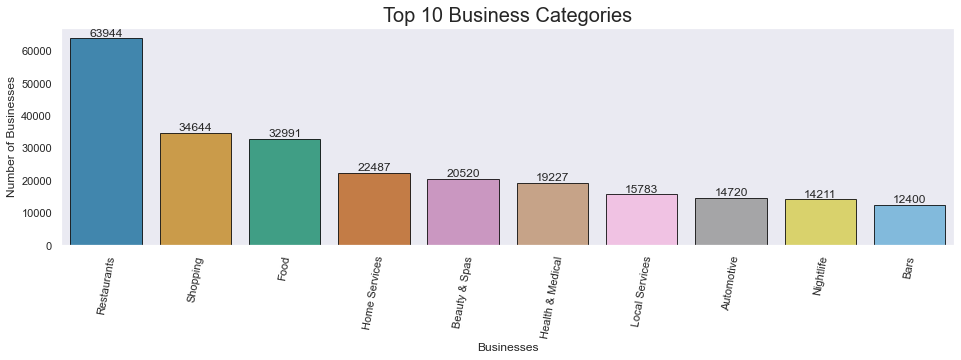

In [10]:
# Creating a dataframe for all the different business categories in the dataset
categories_list = []
rows_list = business_df['categories'].to_list()
for each_row in rows_list:
    row_elements = each_row.split(', ')
    for element in row_elements:
        categories_list.append(element)

categories_df = pd.DataFrame(categories_list, columns = ['business_categories'])

# Computing the frequency of individual category to find the popularity
frequencies = categories_df['business_categories'].value_counts()

# Filtering top 10 business
sorted_category_frequencies = frequencies.sort_values(ascending = False)
top_ten_categories = sorted_category_frequencies[0:10]

#  Creating the bar graph depicting top ten categories distribution in the dataset
plot_title = "Top 10 Business Categories"
x_label = 'Businesses'
y_label = 'Number of Businesses'
create_bar_plot(top_ten_categories, plot_title, x_label, y_label)

#### B) Distribution of Beauty and Spa Services by region

**Distribution of Services across all the states in the dataset**

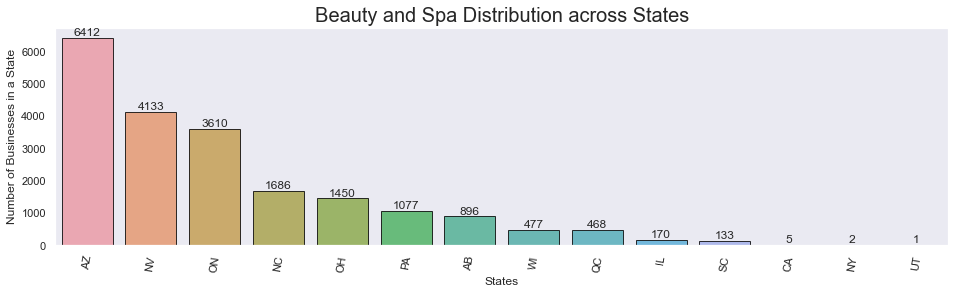

In [11]:
# Computing the number of businesses in a particular state
state_counts = beauty_business_df['state'].value_counts()

# Sorting the frequencies in descending order
sorted_state_counts = state_counts.sort_values(ascending = False)

# Creating the bar graph depicting the business distribution accross the states
plot_title = "Beauty and Spa Distribution across States"
x_label = 'States'
y_label = 'Number of Businesses in a State'
create_bar_plot(sorted_state_counts, plot_title, x_label, y_label)

**Distribution of Services across all the US states in the dataset**

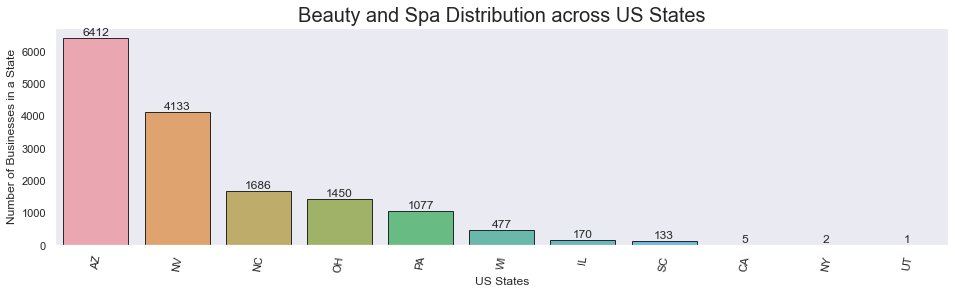

In [12]:
# Computing the number of businesses in a particular US state
us_state_counts = beauty_business_us_df['state'].value_counts()

# Sorting the frequencies in descending order
sorted_us_state_counts = us_state_counts.sort_values(ascending = False)

# Creating the count plot depicting the business distribution accross the states
plot_title = "Beauty and Spa Distribution across US States"
x_label = 'US States'
y_label = 'Number of Businesses in a State'
create_bar_plot(sorted_us_state_counts, plot_title, x_label, y_label)

#### C) Customer Ratings Distribution for Beauty and Spa Services in US

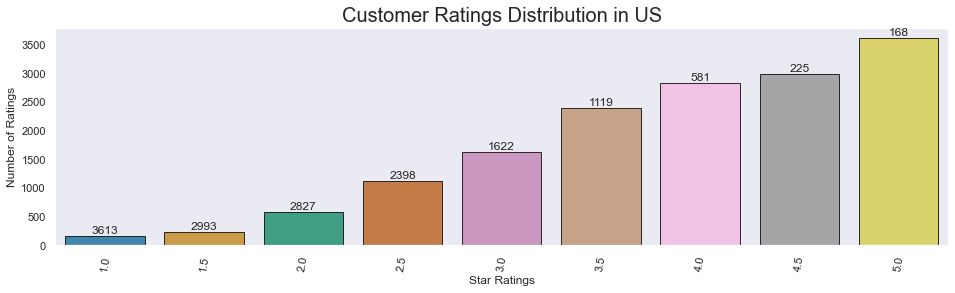

In [13]:
# Counting the number of ratings 
us_rating_counts = beauty_business_us_df['stars'].value_counts()

# Creating the count plot depicting the business distribution accross the states
plot_title = "Customer Ratings Distribution in US"
x_label = 'Star Ratings'
y_label = 'Number of Ratings'
create_bar_plot(us_rating_counts, plot_title, x_label, y_label)

#### D) Most Popular Beauty and Spa Services in US

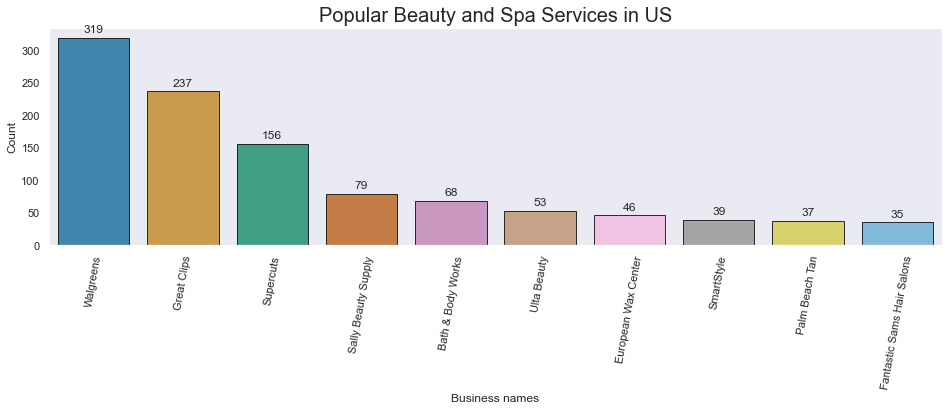

In [14]:
us_services_frequency = beauty_business_us_df['name'].value_counts()

# Sorting the service frequencies
sorted_services_frequency = us_services_frequency.sort_values(ascending = False)
top_ten_services = sorted_services_frequency[0:10]

# Creating the count plot depicting the most popular beauty and spa services
plot_title = "Popular Beauty and Spa Services in US"
x_label = "Business names"
y_label = "Count"
create_bar_plot(top_ten_services, plot_title, x_label, y_label)

#### E) Word Cloud for kinds of Beauty and Spa Services offered in US

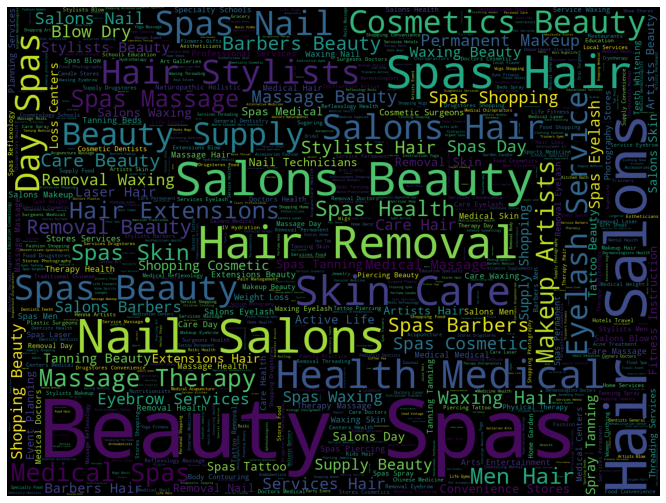

In [15]:
plot_word_cloud(beauty_business_us_df["categories"])


### 5. Categorizing the Reviews

For each of the textual review, we want to find out whether it is a positive or a negative review. The star ratings given by the customers range from 0 - 5. So we will divide the reviews into two categories:
* If the ratings are <= 3, then we will classify them as Bad review
* If the ratings are > 3, then we will classify them as Good review

For the purpose of class labeling, we will use 0 for a Bad review, and 1 for a Good review.

In [16]:
# Method returns the class label 0 or 1 based on the customer ratings
def create_class_label(rating_val):
    if rating_val <= 3:
        return 0
    else:
        return 1

In [17]:
beauty_reviews_us_df['review_label'] = beauty_reviews_us_df['ratings'].apply(create_class_label)
beauty_reviews_us_df.head()

,review_id,customer_id,business_id,business_name,ratings,customer_review,useful,funny,cool,state,review_label
0,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,Rio Hair Salon,1,I am actually horrified this place is still in...,1,1,0,AZ,0
1,i5AtsDlF3fSnBQ5gAgTbeg,VraV4Ci-oJsONsoIWCNeXA,lbrU8StCq3yDfr-QMnGrmQ,Rio Hair Salon,2,Had a haircut there once with the owner and it...,3,1,0,AZ,0
2,kSRygZjrxPIem7X6FDFZPA,V0bjhLRLphO2OYj-enP-dw,lbrU8StCq3yDfr-QMnGrmQ,Rio Hair Salon,1,I came in this evening to get a haircut. There...,1,0,0,AZ,0
3,lpFIJYpsvDxyph-kPzZ6aA,dsd-KNYKMpx6ma_sRWCSkQ,FNCJpSn0tL9iqoY3JC73qw,Centennial Dermatology & Skin Cancer,5,"Awesome office and staff, very professional an...",0,0,0,NV,1
4,n_5tzMmaeBCUigwjnBQbow,Rl9tRa2QlcjGSvIfUVFwSQ,FNCJpSn0tL9iqoY3JC73qw,Centennial Dermatology & Skin Cancer,5,I feel so lucky to have found Centennial derma...,0,0,0,NV,1


### 6. Pre-processing the textual reviews for Natural Language Processing (NLP)

In order to perform sentiment analysis using natural language processing, we have to clean the textual data to remove the unnecessary content and highlight the key attributes suitable for the Machine Learning.

We will perform following steps to clean the customer reviews text:
1. **Converting to lower case:** A text contains capitalized letter at various places such as start of the sentences or to emphasize proper nouns. So we convert the entire text to lower case for simplification purpose.


2. **Tokenizing the text:** This means to split the sentences into individual words and punctuations by empty spaces.


3. **Removing punctuations and Special Characters:** Punctuations doesn't add value to the sentiment analysis. So we will get rid of them.


4. **Removing stop words:** Majority of the words in a given text are connecting parts of a sentence and hence does not give out much information about the sentiments of the text. Examples: "the", "and", "or", "is" etc. We will compare such words against the list of stop words and remove them.


5. **Handling negation stop words differently:** We do not want to remove negation stop words from the text because many a times, their presence may change the sentiments of the text. Example1: "She did a good hair cut", Example2: "She did not do a good hair cut". Removing "not" from the second example would completely change the intent of the review.


6. **Removing all single characters:** Single characters won't add any meaning to the sentiment analysis so we will get rid of them.


In [18]:
# Removing negation stop words from the list
stop_words = stopwords.words('english')
required_stop_words = ['against','off','few','more','few', 'more','most', 'some', 'such', 'no', 'nor', 
                               'not', 'only', 'same', 'so','too', 'very', 'don', "don't", 'should', "should've", 
                               'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', 
                               "hadn't", 'hasn',"hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 
                               'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
                               'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]   
stop_words_subset = set(stop_words) - set(required_stop_words)

In [19]:
# Method returns the cleaned review text after removing all unnecessary elements from the text.    
def cleaning_text(review_text):
    review_text = review_text.lower()    
    review_text = review_text.split(" ") 
    review_text = [word for word in review_text if word.isalnum()]                                                                           
    review_text = [word for word in review_text if word not in stop_words_subset] 
    review_text = [word for word in review_text if len(word) > 1]
    review_text = " ".join(review_text)
    return(review_text)
  

In [20]:
beauty_reviews_us_df['cleaned_review'] = beauty_reviews_us_df['customer_review'].apply(cleaning_text)

#### Creating a word cloud to display frequent words from the customer reviews

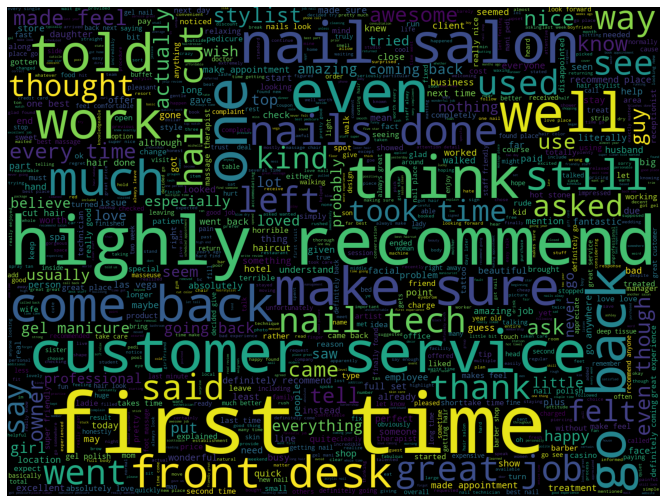

In [21]:
plot_word_cloud(beauty_reviews_us_df["cleaned_review"])

### 7. Sentiment Analysis using feature extraction

#### A) Bag of Words feature extraction

It is a way of representing a text as the bag of words, disregarding the grammer and the order in which they appear in the text. The Model is only concerned whether the word is associated with a good review or bad review in this case.

* We will start by converting the cleaned review text into tokens and associating each token with the corresponding class label.
* Storing all the tokens with their respective class label as a features list.
* Splitting the features dataset into train and test sets in the ratio of 70:30
* Training the Naive Bayes classification model using train dataset and then evaluating its performance using test dataset

#### Feature Extraction

In [22]:
# Method converts the text into tokens
def text_tokenizing(clean_text):
    tokens = clean_text.split(" ") 
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

beauty_reviews_us_df['review_tokens'] = beauty_reviews_us_df['cleaned_review'].apply(text_tokenizing)

In [23]:
# Method to consider the tokens as features
def get_features(token):
    return {token: True}

# Method combines the tokens of all the reviews in the dataframe and returns a list
def get_review_tokens_for_model(review_tokens_list):
    features_list = []
    for row in review_tokens_list:
        for token in row:
            features_list.append(token)
    return features_list

In [24]:
list_of_token_rows = beauty_reviews_us_df['review_tokens'].to_list()
all_review_tokens = get_review_tokens_for_model(list_of_token_rows)

In [25]:
# Obtaining a list of tuples in the form (token, associated class label)
labeled_data = []
for index, row in beauty_reviews_us_df.iterrows():
    for token in row["review_tokens"]:
        labeled_data.append((token, row["review_label"]))
        
labeled_data[:10]

[('actually', 0),
 ('horrified', 0),
 ('place', 0),
 ('still', 0),
 ('year', 0),
 ('old', 0),
 ('son', 0),
 ('needed', 0),
 ('haircut', 0),
 ('past', 0)]

In [26]:
# Obtaining a list of features extracted for training the model.
features_list = [(get_features(token), label) for (token, label) in labeled_data]
features_list[:10]

[({'actually': True}, 0),
 ({'horrified': True}, 0),
 ({'place': True}, 0),
 ({'still': True}, 0),
 ({'year': True}, 0),
 ({'old': True}, 0),
 ({'son': True}, 0),
 ({'needed': True}, 0),
 ({'haircut': True}, 0),
 ({'past': True}, 0)]

#### Building classification model using extracted features

In [27]:
# Shuffling the features dataset and splitting it into train and testing sets in the ratio 70:30
random.shuffle(features_list)
train_split = int(0.7 * len(features_list))
train_data = features_list[ : train_split]
test_data = features_list[train_split : ]

In [28]:
# Training the model using the train dataset
classifier = NaiveBayesClassifier.train(train_data)
accuracy = nltk.classify.accuracy(classifier, test_data)
                                  
print("Accuracy of the model using bag of words as the feaures is: {}%".format(round(accuracy * 100, 2)))

Accuracy of the model using bag of words as the feaures is: 65.77%


In [29]:
important_features = classifier.show_most_informative_features(10)
print(important_features)

Most Informative Features
               unethical = True                0 : 1      =    110.9 : 1.0
                  bureau = True                0 : 1      =     94.9 : 1.0
                audacity = True                0 : 1      =     84.2 : 1.0
            disrespected = True                0 : 1      =     81.6 : 1.0
                  argued = True                0 : 1      =     80.8 : 1.0
                 angrily = True                0 : 1      =     62.7 : 1.0
                  rudest = True                0 : 1      =     61.0 : 1.0
            incompetence = True                0 : 1      =     59.7 : 1.0
                  shaina = True                1 : 0      =     56.5 : 1.0
                  huffed = True                0 : 1      =     55.7 : 1.0
None


It can be observed from above important features that the words like audacity, argued, humiliated etc are more likely to be negative emotions. The words such as olga and shaina seems to be the names of the people working in the beauty and spa services. They are associated with the positve emotions.

#### B) Polarity Scores feature extraction


We will use VADER (Valence Aware Dictionary for Sentiment Reasoning) model for extracting features such as positive, negative or neutral polarity of the customer review. 


VADER contains a comprehensive list of sentiment words, phrases as well as emoticons. All these words are rated for polarity and intensity on the scale of -4 to +4.
* -4 indicates extremely negative sentiment.
* +4 indicates extremely positive sentiment.
* Any word not listed in the dictionary will be given 0 score indicating neutral sentiment.
* An average score is computed which is used as the sentiment indicator for each word/phrase/emoticon in the dictionary


VADER will scan the text for the sentiment features and assign the polarity and intensity scores to each feature. These scores are then combined and normalized to obtain an overall sentiment score of the review text. This score is called the compound score.
* If the compound score < 0: then we will classify the sentiment as Negative
* If the compound score > 0: then we will classify the sentiment as Positive

#### Computing Polarity Scores of the reviews for feature extraction

In [30]:
# Method returns polarity scores (positive, neutral, negative and compound) in the form of a dictionary for a given text
def compute_sentiment_polarity(text):
    return sid.polarity_scores(text)

beauty_reviews_us_df['polarity_scores'] = beauty_reviews_us_df['cleaned_review'].apply(compute_sentiment_polarity)
beauty_reviews_us_df['compound_score']  = beauty_reviews_us_df['polarity_scores'].apply(lambda score_dict: score_dict['compound'])
beauty_reviews_us_df.head()

,review_id,customer_id,business_id,business_name,ratings,customer_review,useful,funny,cool,state,review_label,cleaned_review,review_tokens,polarity_scores,compound_score
0,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,Rio Hair Salon,1,I am actually horrified this place is still in...,1,1,0,AZ,0,actually horrified place still year old son ne...,"[actually, horrified, place, still, year, old,...","{'neg': 0.192, 'neu': 0.76, 'pos': 0.048, 'com...",-0.9519
1,i5AtsDlF3fSnBQ5gAgTbeg,VraV4Ci-oJsONsoIWCNeXA,lbrU8StCq3yDfr-QMnGrmQ,Rio Hair Salon,2,Had a haircut there once with the owner and it...,3,1,0,AZ,0,haircut owner 2nd time only person talked so m...,"[haircut, owner, 2nd, time, only, person, talk...","{'neg': 0.064, 'neu': 0.873, 'pos': 0.063, 'co...",0.2263
2,kSRygZjrxPIem7X6FDFZPA,V0bjhLRLphO2OYj-enP-dw,lbrU8StCq3yDfr-QMnGrmQ,Rio Hair Salon,1,I came in this evening to get a haircut. There...,1,0,0,AZ,0,came evening get no customers salon yet stylis...,"[came, evening, get, no, customers, salon, yet...","{'neg': 0.156, 'neu': 0.79, 'pos': 0.053, 'com...",-0.5574
3,lpFIJYpsvDxyph-kPzZ6aA,dsd-KNYKMpx6ma_sRWCSkQ,FNCJpSn0tL9iqoY3JC73qw,Centennial Dermatology & Skin Cancer,5,"Awesome office and staff, very professional an...",0,0,0,NV,1,awesome office very professional saw adam garl...,"[awesome, office, very, professional, saw, ada...","{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compou...",0.8789
4,n_5tzMmaeBCUigwjnBQbow,Rl9tRa2QlcjGSvIfUVFwSQ,FNCJpSn0tL9iqoY3JC73qw,Centennial Dermatology & Skin Cancer,5,I feel so lucky to have found Centennial derma...,0,0,0,NV,1,feel so lucky found centennial entire staff we...,"[feel, so, lucky, found, centennial, entire, s...","{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.9347


#### Building classification model using extracted features

In [31]:
features_for_training = ["compound_score"]
label = ["review_label"]

# split the features data into train and test
train_data, test_data, train_label, test_label = train_test_split(beauty_reviews_us_df[features_for_training], beauty_reviews_us_df[label], test_size = 0.20, random_state = 42)

# Training the classification model
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(train_data, train_label)

# Evaluating model performance
test_label_predicted = classifier.predict(test_data)
accuracy = metrics.accuracy_score(test_label, test_label_predicted)

print("Accuracy of the model using VADER sentiments polarity scores is: {}%".format(round(accuracy * 100, 2)))

Accuracy of the model using VADER sentiments polarity scores is: 82.46%


#### C) Feature extraction using word embedding method

We will use doc2vec for converting the text documents into numerical vectors. By obtaining the numerical representation of each word, we will easily be able to capture the relationship between different words. The placement of vectors is such that the words with similar meaning will appear together and the words with different meanings will be located far away.
* For example: words such as Mango, Apple, Grapes will be placed together as these fall under the category of fruits. Words such as book or cycle will be placed far away.


We will be using Gensim modeling toolkit to implement doc2vec. 

#### Preparing the input data for building doc2vec model
* First tokenize the string of a review text 
* Represent the set of tokens for a particular text with an integer tag.

In [32]:
tagged_documents = [TaggedDocument(document, [index]) for index, document in enumerate(beauty_reviews_us_df["cleaned_review"].apply(lambda x: x.split(" ")))]
tagged_documents[0:3]

[TaggedDocument(words=['actually', 'horrified', 'place', 'still', 'year', 'old', 'son', 'needed', 'haircut', 'past', 'summer', 'lure', 'kids', 'cut', 'signs', 'got', 'wait', 'few', 'minutes', 'stylists', 'working', 'decor', 'place', 'total', 'so', 'sofa', 'time', 'pleather', 'sofa', 'giant', 'holes', 'son', 'noticed', 'ants', 'crawling', 'floor', 'disgusting', 'should', 'walked', 'should', 'turned', 'around', 'walked', 'upon', 'entering', 'so', 'older', 'black', 'male', 'stylist', 'finishes', 'haircut', 'tell', 'want', 'clipper', 'around', 'back', 'sides', 'hand', 'cut', 'top', 'standard', 'boys', 'really', 'freaking', 'rather', 'use', 'clippers', 'go', 'actually', 'cut', 'went', 'using', 'moving', 'downward', 'cut', 'rubs', 'against', 'man', 'alleged', 'cosmetology', 'license', 'not', 'know', 'use', 'set', 'freaking', 'realized', 'almost', 'immediately', 'no', 'idea', 'no', 'idea', '10', 'minutes', 'watching', 'guy', 'stumble', 'said', 'know', 'paid', 'wanted', 'get', 'scummy', 'joint

#### Building and training the doc2vec model using the tagged documents created above
Parameters used in model building are - 
* vector_size: Represents dimensionality of the feature vectors
* window: Represents maximum distance between the current and predicted word within a sentence.
* min_count = This will ignores all the words with total frequency lower than min_count value.
* workers: Represents the number of worker threads to train the model.

In [33]:
# Building the model
doc2vec_model = Doc2Vec(tagged_documents, vector_size = 6, window = 2, min_count = 1, workers = 4)

# Training the model
doc2vec_model.train(tagged_documents, total_examples = doc2vec_model.corpus_count, epochs = 5)

#### Examples of most similar and dissimilar words

In [34]:
similar_words = doc2vec_model.most_similar("kind")
print("Similar words to the word kind along with the similarity score are: ")
print(similar_words)

Similar words to the word kind along with the similarity score are: 
[('occonnell', 0.9853072166442871), ('receptive', 0.9845409989356995), ('feel', 0.9772622585296631), ('manner', 0.9771403074264526), ('demeanor', 0.976001501083374), ('humor', 0.9746789336204529), ('judgmental', 0.9742738604545593), ('guides', 0.9742714166641235), ('considerate', 0.9738136529922485), ('approaches', 0.9722641110420227)]


In [35]:
text = 'See you later. Please visit again'
most_dissimilar_word = doc2vec_model.doesnt_match(text.split())
print("The most dissimilar word from the input text is: {}".format(most_dissimilar_word))

The most dissimilar word from the input text is: visit


#### Transforming each customer review into vector space

In [36]:
vector_df = beauty_reviews_us_df["cleaned_review"].apply(lambda x: doc2vec_model.infer_vector(x.split(" "))).apply(pd.Series)
num_of_cols = len(vector_df.columns)
vector_df.columns = ["vector_{}".format(num) for num in range(1,num_of_cols+1)]
beauty_reviews_us_df = pd.concat([beauty_reviews_us_df, vector_df], axis = 1)


In [37]:
beauty_reviews_us_df.head()

,review_id,customer_id,business_id,business_name,ratings,customer_review,useful,funny,cool,state,...,cleaned_review,review_tokens,polarity_scores,compound_score,vector_1,vector_2,vector_3,vector_4,vector_5,vector_6
0,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,Rio Hair Salon,1,I am actually horrified this place is still in...,1,1,0,AZ,...,actually horrified place still year old son ne...,"[actually, horrified, place, still, year, old,...","{'neg': 0.192, 'neu': 0.76, 'pos': 0.048, 'com...",-0.9519,0.075745,0.241684,-0.327829,0.576886,-0.373909,0.311361
1,i5AtsDlF3fSnBQ5gAgTbeg,VraV4Ci-oJsONsoIWCNeXA,lbrU8StCq3yDfr-QMnGrmQ,Rio Hair Salon,2,Had a haircut there once with the owner and it...,3,1,0,AZ,...,haircut owner 2nd time only person talked so m...,"[haircut, owner, 2nd, time, only, person, talk...","{'neg': 0.064, 'neu': 0.873, 'pos': 0.063, 'co...",0.2263,0.269522,0.396478,-0.449637,0.396593,0.244278,0.307457
2,kSRygZjrxPIem7X6FDFZPA,V0bjhLRLphO2OYj-enP-dw,lbrU8StCq3yDfr-QMnGrmQ,Rio Hair Salon,1,I came in this evening to get a haircut. There...,1,0,0,AZ,...,came evening get no customers salon yet stylis...,"[came, evening, get, no, customers, salon, yet...","{'neg': 0.156, 'neu': 0.79, 'pos': 0.053, 'com...",-0.5574,0.029478,0.115136,-0.409520,0.301546,-0.248852,0.133503
3,lpFIJYpsvDxyph-kPzZ6aA,dsd-KNYKMpx6ma_sRWCSkQ,FNCJpSn0tL9iqoY3JC73qw,Centennial Dermatology & Skin Cancer,5,"Awesome office and staff, very professional an...",0,0,0,NV,...,awesome office very professional saw adam garl...,"[awesome, office, very, professional, saw, ada...","{'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compou...",0.8789,0.057037,-0.131768,-0.181096,0.084544,0.204458,-0.118139
4,n_5tzMmaeBCUigwjnBQbow,Rl9tRa2QlcjGSvIfUVFwSQ,FNCJpSn0tL9iqoY3JC73qw,Centennial Dermatology & Skin Cancer,5,I feel so lucky to have found Centennial derma...,0,0,0,NV,...,feel so lucky found centennial entire staff we...,"[feel, so, lucky, found, centennial, entire, s...","{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.9347,0.180247,-0.012718,-0.042671,0.037993,0.245319,-0.113093


#### Building classification model using extracted features

In [38]:
features_for_training = ["vector_1", "vector_2", "vector_3", "vector_4", "vector_5", "vector_6"]
label = ["review_label"]

# split the features data into train and test
train_data, test_data, train_label, test_label = train_test_split(beauty_reviews_us_df[features_for_training], beauty_reviews_us_df[label], test_size = 0.20, random_state = 42)

In [39]:
# Training the Random classification model
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(train_data, train_label)

# Evaluating model performance
test_label_predicted = classifier.predict(test_data)
accuracy = metrics.accuracy_score(test_label, test_label_predicted)

print("Accuracy of the Random Classification model using doc2vec modeling technique is: {}%".format(round(accuracy * 100, 2)))

Accuracy of the Random Classification model using doc2vec modeling technique is: 85.69%


In [40]:
# Training the Support Vector classification model
classifier = SVC()
classifier.fit(train_data, train_label)

# Evaluating model performance
test_label_predicted = classifier.predict(test_data)
accuracy = metrics.accuracy_score(test_label, test_label_predicted)

print("Accuracy of the Support Vector Classification model using doc2vec modeling technique is: {}%".format(round(accuracy * 100, 2)))

Accuracy of the Support Vector Classification model using doc2vec modeling technique is: 85.79%


## Conclusion

Performance evaluation of the classification models based on the features extracted using various techniques:


* **Bag of Words:**
    * Naive Bayes Model was trained using these features. It could predict the sentiments of a review with 65.77% accuracy.


* **VADER Polarity Scores:**
    * Random Forest Model was trained using these features. It could predict the sentiments of a review with 82.46% accuracy.


* **Word Embedding:** 
    * Random Forest Model was trained using these features. It could predict the sentiments of a review with 85.69% accuracy
    * Support Vectors Model was trained using these features. It could predict the sentiments of a review with 85.79% accuracy


Inferences:

* Bag of Word technique is the most fundamental technique for feature extraction since it uses only the words as features for sentiment analysis. Classification model built on features extracted using this technique has the lowest prediction accuracy. 


* Word Embedding feature extraction technique is based on the principle that the most similar group of words will be placed together and dissimilar words will be placed far from each other. It can very well capture the relation between the words. Classification model built on features extracted using this technique has the highest prediction accuracy.
